In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
submit_1 = pd.read_csv('./best_sumbmissions/submit_evgen_15.csv')
submit_2 = pd.read_csv('./best_sumbmissions/submit_maks_81_44.csv')
submit_3 = pd.read_csv('./best_sumbmissions/submit_maks_81_43.csv')

In [4]:
pred_1 = submit_1['target']
pred_2 = submit_2['target']
pred_3 = submit_3['target']

/tmp/ipykernel_102385/2854284752.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scaled_pred_1, scaled_pred_2, scaled_pred_3], labels=['Best', '81.44', '81.43'])


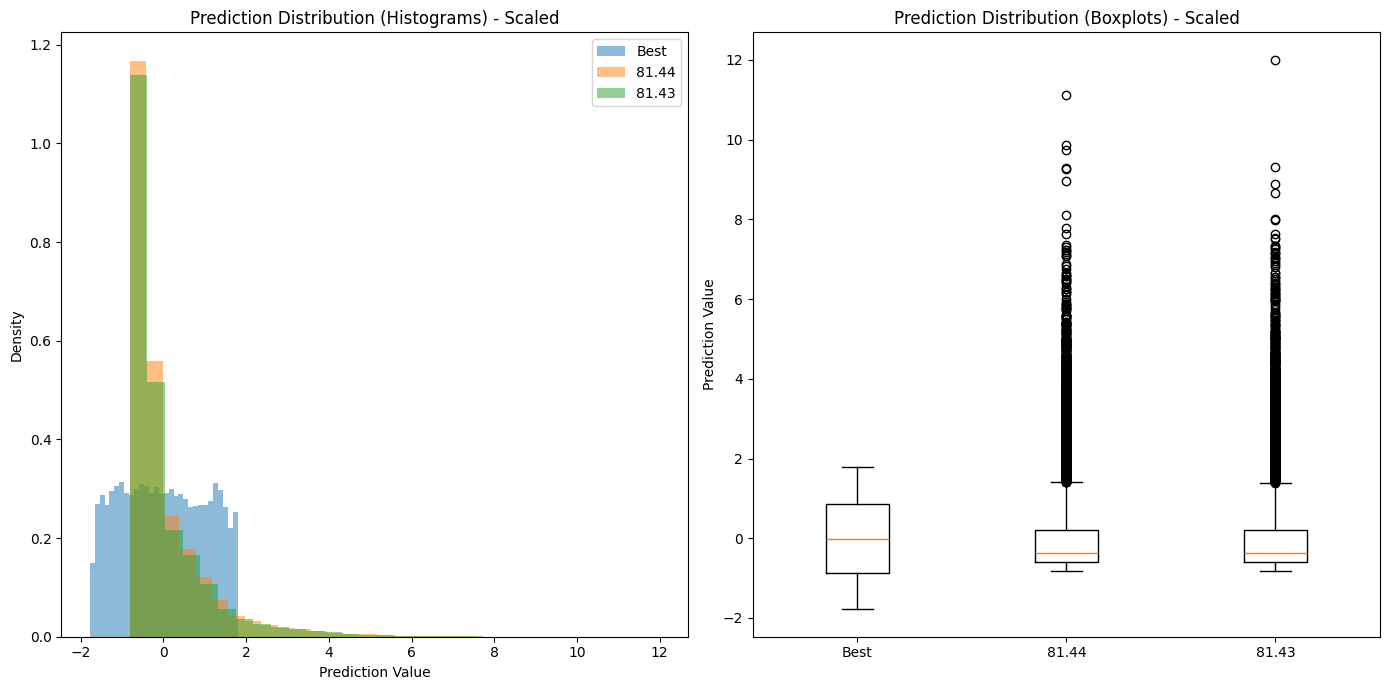

In [7]:
from sklearn.preprocessing import StandardScaler

pred_data = [pred_1.to_numpy(), pred_2.to_numpy(), pred_3.to_numpy()]

scaler = StandardScaler()
scaled_pred_data = [scaler.fit_transform(data.reshape(-1, 1)).flatten() for data in pred_data]
scaled_pred_1, scaled_pred_2, scaled_pred_3 = scaled_pred_data

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(scaled_pred_1, bins=30, alpha=0.5, label="Best", density=True)
plt.hist(scaled_pred_2, bins=30, alpha=0.5, label="81.44", density=True)
plt.hist(scaled_pred_3, bins=30, alpha=0.5, label="81.43", density=True)
plt.title('Prediction Distribution (Histograms) - Scaled')
plt.xlabel('Prediction Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([scaled_pred_1, scaled_pred_2, scaled_pred_3], labels=['Best', '81.44', '81.43'])
plt.title('Prediction Distribution (Boxplots) - Scaled')
plt.ylabel('Prediction Value')

plt.tight_layout()
plt.show()

In [ ]:
average_pred = (pred_1 + pred_2 + pred_3) / 3

weights = [0.5, 0.25, 0.25]
# weighted_avg_pred = (weights[0] * pred_1 + weights[1] * pred_2 + weights[2] * pred_3)
# pd.DataFrame({'id': submit_1['id'], 'target': weighted_avg_pred}).to_csv('../submit_weighted_avg.csv', index=False)

In [9]:
rank_1 = stats.rankdata(pred_1)
rank_2 = stats.rankdata(pred_2)
rank_3 = stats.rankdata(pred_3)

rank_avg = (rank_1 + rank_2 + rank_3) / 3

weighted_rank_avg = (weights[0] * rank_1 + weights[1] * rank_2 + weights[2] * rank_3)

pd.DataFrame({'id': submit_1['id'], 'target': weighted_rank_avg}).to_csv('../final_submssion.csv', index=False)